## Download data

In [1]:
import numpy as np
import keras

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Explore data

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
type(x_train)

numpy.ndarray

In [7]:
x_train.ndim

3

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[2]

4

In [11]:
y_train[0]

5

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

index_ 2 : 4
index_ 4 : 9
index_ 0 : 5
index_ 7 : 3
index_ 22 : 9
index_ 84 : 7


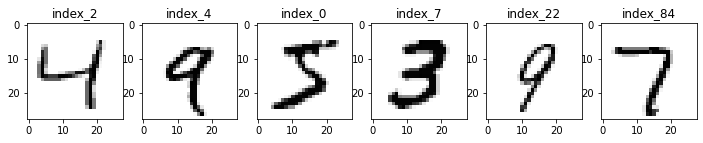

In [13]:
l = [2,4,0,7,22,84]
for i in l:
    print("index_",i,":",y_train[i])



import matplotlib.pyplot as plt

plt.figure(figsize = (12,4))
plt.subplot(161)
plt.title("index_2")
plt.imshow(x_train[2],cmap = 'Greys')
plt.subplot(162)
plt.title("index_4")
plt.imshow(x_train[4],cmap = 'Greys')
plt.subplot(163)
plt.title("index_0")
plt.imshow(x_train[0],cmap = 'Greys')
plt.subplot(164)
plt.title("index_7")
plt.imshow(x_train[7],cmap = 'Greys')
plt.subplot(165)
plt.title("index_22")
plt.imshow(x_train[22],cmap = 'Greys')
plt.subplot(166)
plt.title("index_84")
plt.imshow(x_train[84],cmap = 'Greys')

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

## Build model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [17]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
x_train1 = x_train.reshape(60000,28,28)
x_test1 = x_test.reshape(10000,28,28)

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train1.shape

(60000, 28, 28)

In [21]:
x_train1.min()

0

In [22]:
x_train1.max()

255

In [23]:
x_train1 = x_train1.astype('float32') / 255
x_test1 = x_test1.astype('float32') / 255

## Compile model

In [24]:
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [25]:
y_train.shape

(60000,)

## Fit model

In [26]:
model.fit(x_train1,y_train,epochs = 10, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3145 - accuracy: 0.9096
Epoch 2/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.1313 - accuracy: 0.9615
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0872 - accuracy: 0.9749
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0626 - accuracy: 0.9815
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0478 - accuracy: 0.9858
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0367 - accuracy: 0.9889
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0288 - accuracy: 0.9919
Epoch 8/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0226 - accuracy: 0.9937
Epoch 9/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.0180 - accuracy: 0.9952
Epoch 10/10
60000/60000 [==============================

## Calculate performance

In [27]:
loss,acc = model.evaluate(x_test1,y_test)

10000/10000 [==============================] - 1s 129us/step


In [28]:
print(loss)

0.06299079719436122


In [29]:
print(acc)

0.9800000190734863


# CNN:

In [31]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape((60000,28,28,1))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype('float32') / 255

x = x_train[:50000]
x_val = x_train[50000:]
y = y_train[:50000]
y_val = y_train[50000:]

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dense

In [34]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(64,(3,3),activation = 'relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(64,(3,3),activation = 'relu'))
cnn.add(Flatten())
cnn.add(Dense(64,activation = 'relu'))
cnn.add(Dense(10,activation = 'softmax'))

cnn.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics  = ['accuracy'])

cnn.fit(x,y,epochs = 10, batch_size = 64, validation_data = (x_val,y_val))

cnn.summary()

loss,acc = cnn.evaluate(x_test,y_test)

print("loss:",round(loss,3))
print("acc:",round(acc,3))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 293us/step - loss: 0.1956 - accuracy: 0.9379 - val_loss: 0.0716 - val_accuracy: 0.9791
Epoch 2/10
50000/50000 [==============================] - 9s 170us/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0513 - val_accuracy: 0.9837
Epoch 3/10
50000/50000 [==============================] - 9s 171us/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.0399 - val_accuracy: 0.9888
Epoch 4/10
50000/50000 [==============================] - 11s 213us/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0368 - val_accuracy: 0.9902
Epoch 5/10
50000/50000 [==============================] - 9s 187us/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0356 - val_accuracy: 0.9899
Epoch 6/10
50000/50000 [==============================] - 9s 186us/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0357 - val_accuracy: 0.9917
Epoch 7/10
50000/50000 [==============================] - 10